<br>
# ** 8 Python for Finance**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)  
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; map, reduce, lambda, filter**
1. map & lambda : map(lambda x : str(x), [list])
1. map & lambda : list(map(lambda x : str(x), [list]))
1. map & lambda : <strike>[ map(lambda x : str(x), data) ]</strike>
1. Series & lambda : Series.apply(lambda x : str(x))
1. filter & lambda : list(filter(lambda x : x % 2 == 0,  data))
1. <strike>filter</strike> & DataFrame : DataFrame[ Series % 2 == 0 ]
1. reduce & lambda : reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])      # 데이터 차원축소

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()


### **review &nbsp; bs4**
1. soup = BeautifulSoup(html_doc, 'lxml')
1. soup.tags.attrs &nbsp; | &nbsp; soup.tags.attrs() 
1. soup.tags.contents
1. soup.tags.string.replacewith()
1. soup.find('tag명') &nbsp; | &nbsp; soup.find_all('tag명')
1. soup.find_all('a')[0].get_text()
1. soup.find_all('태그',{'class':"클래스 속성"})
1. soup.find_all('태그', {'class':re.compile('속성명 일부')})
1. soup.body.descendants &nbsp; | &nbsp; soup.p.string.parent

### **review &nbsp; lxml**
1. XPath 는 'query language'로써 XML의 nodes 들을 선택하는데 용이
1. **'\\'** 와 **'\\\\'** 의 기능을 구분
1. from &nbsp; lxml.html &nbsp; import &nbsp; fromstring
1. fromstring(response.text).xpath("/html/body/div/h1")[0]

### **Notes Numpy**
1. np.linspace()   : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성
1. from scipy import stats
1. slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.polyval(reg, x))

<br><br>
## <strong>1 시계열과 시계열 데이터 보간법
pandas를 활용한 데이터 정렬 및 보간법

<br>
### <strong>01 KOSPI 지수와 구성종목 연산
1. Nan 등 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
from googlefinance.get import get_data

codes = ['KRX:005930','KRX:000660','NYSE:GM','NYSE:KO']
data = get_data(codes, period='4Y')
data.head(2)

,code,open,high,low,close,volume
date,,,,,,
2014-04-07,KRX:005930,1397000.0,1397000.0,1374000.0,1397000.0,214199
2014-04-08,KRX:005930,1387000.0,1399000.0,1375000.0,1394000.0,211705


In [2]:
from googlefinance.get import get_colume
prices = get_colume(data, output='close')
prices = prices.fillna(method='ffill')     # 중간에 Nan이 존재시, 직전의 가격을 덧붙인다
prices = prices.dropna()                   # 앞부분이 비면 삭제한다
prices.head(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2014-04-08,1394000.0,34.11,38.62,36750.0
2014-04-09,1371000.0,34.53,38.90,37650.0
2014-04-10,1380000.0,33.62,38.99,37700.0


In [3]:
volume = get_colume(data, output='volume')
volume = volume.fillna(method='ffill')   # 중간에 Nan이 존재시, 직전의 가격을 덧붙인다
volume = volume.dropna()             # 앞부분이 비면 삭제한다
volume.head(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2014-04-08,211705.0,24348132.0,17295654.0,2160940.0
2014-04-09,319538.0,20615564.0,14770515.0,2738200.0
2014-04-10,198164.0,33165365.0,12031360.0,1926910.0


In [4]:
# target : 해당 종목들의 평균가를 계산
# 테이블의 크기와 Index/ columns 가 일치하면, 테이블간의 계산이 쉽게 가능하다
vwap = round((prices * volume).sum() / volume.sum(), 3)
vwap

KRX:005930    1659573.597
NYSE:GM            34.557
NYSE:KO            42.685
KRX:000660      49784.109
dtype: float64

In [5]:
# (prices 데이터 프레임과, volume 데이터 프레임을 튜플로 묶는다)
prices.align(volume, join='inner')

(            KRX:005930  NYSE:GM  NYSE:KO  KRX:000660
 date                                                
 2014-04-08   1394000.0    34.11    38.62     36750.0
 2014-04-09   1371000.0    34.53    38.90     37650.0
 2014-04-10   1380000.0    33.62    38.99     37700.0
 2014-04-11   1365000.0    33.30    38.89     37050.0
 2014-04-12   1365000.0    31.93    38.63     37050.0
 2014-04-14   1370000.0    31.93    38.63     36900.0
 2014-04-15   1370000.0    32.55    38.73     37400.0
 2014-04-16   1380000.0    33.36    40.18     37650.0
 2014-04-17   1370000.0    33.97    40.59     38050.0
 2014-04-18   1378000.0    33.98    40.72     39200.0
 2014-04-21   1380000.0    33.98    40.72     39400.0
 2014-04-22   1375000.0    33.98    40.75     39800.0
 2014-04-23   1389000.0    34.23    40.71     40750.0
 2014-04-24   1407000.0    34.39    40.73     40900.0
 2014-04-25   1399000.0    34.17    40.70     40750.0
 2014-04-26   1399000.0    33.72    41.01     40750.0
 2014-04-28   1388000.0    3

<br>
### <strong>02 다른 빈도를 갖는 시계열 연산
1. resample : 데이터를 고정 빈도로 변환
1. reindex : 데이터를 새로운 색인으로 합친다
1. 두 방법 모두 보간법을 지원한다

In [6]:
# 매주 수요일을, 3주 데이터 생성
ts1 = pd.Series(np.random.randn(3),
               index=pd.date_range('2018-02-01', periods=3, freq='W-WED'))
ts1

2018-02-07    0.099838
2018-02-14   -1.268559
2018-02-21   -0.772462
Freq: W-WED, dtype: float64

<br>
### **.resample()** : 데이터를 고정 빈도로 변환
낮은 빈도 데이터를 상위 빈도로 변환 보간법 : **UpScaling**

In [7]:
# .resample() Date의 보간법
# 뒤에 보간방법을 정의해야 한다
ts1.resample('B')

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, base=0]

In [8]:
# .resample() Date의 보간법
ts1.resample('B').ffill()

2018-02-07    0.099838
2018-02-08    0.099838
2018-02-09    0.099838
2018-02-12    0.099838
2018-02-13    0.099838
2018-02-14   -1.268559
2018-02-15   -1.268559
2018-02-16   -1.268559
2018-02-19   -1.268559
2018-02-20   -1.268559
2018-02-21   -0.772462
Freq: B, dtype: float64

In [9]:
# .resample() Date의 보간법
ts1 = ts1.resample('B').bfill()
ts1

2018-02-07    0.099838
2018-02-08   -1.268559
2018-02-09   -1.268559
2018-02-12   -1.268559
2018-02-13   -1.268559
2018-02-14   -1.268559
2018-02-15   -0.772462
2018-02-16   -0.772462
2018-02-19   -0.772462
2018-02-20   -0.772462
2018-02-21   -0.772462
Freq: B, dtype: float64

<br>
### **.reindex()** : 새로운 날짜 색인을 적용하여 변환
보간법 : **UpScaling**

In [10]:
dates = pd.DatetimeIndex(['2018-02-02', '2018-02-09', '2018-02-12',
                          '2018-02-21', '2018-02-23', '2018-02-28'])
ts2 = pd.Series(np.random.randn(6), index=dates)
ts2

2018-02-02   -0.138228
2018-02-09    0.268815
2018-02-12   -0.396980
2018-02-21    1.023463
2018-02-23   -0.529494
2018-02-28    0.180676
dtype: float64

In [11]:
ts1.reindex(ts2.index).bfill()

2018-02-02   -1.268559
2018-02-09   -1.268559
2018-02-12   -1.268559
2018-02-21   -0.772462
2018-02-23         NaN
2018-02-28         NaN
dtype: float64

In [12]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2018-02-02         NaN
2018-02-09   -0.999744
2018-02-12   -1.665539
2018-02-21    0.251001
2018-02-23   -1.301956
2018-02-28   -0.591786
dtype: float64

<br>
### **03 Period** 를 사용한 보간법
연간, 분기별 데이터를 정리하는 특별양식에  적용하는 경우

In [13]:
# 회계 마감이 9월인 분기별 이익자료를 생성
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
               index=pd.period_range('2017Q2', periods=7, freq='Q-SEP'))
gdp

2017Q2    1.78
2017Q3    1.94
2017Q4    2.08
2018Q1    2.01
2018Q2    2.15
2018Q3    2.31
2018Q4    2.46
Freq: Q-SEP, dtype: float64

In [14]:
inf1 = pd.Series([0.025, 0.045, 0.037, 0.04],
                index = pd.period_range('2016', periods = 4, freq = 'A-DEC'))
inf1

2016    0.025
2017    0.045
2018    0.037
2019    0.040
Freq: A-DEC, dtype: float64

In [15]:
# gdp + inf1  : 기본적으로 인덱스가 다르면 연산할 내용이 없어서 오류가 발생한다
# inf1 데이터를 분기 데이터로 변환
inf1_q = inf1.asfreq('Q-SEP', how='end')
inf1_q

2017Q1    0.025
2018Q1    0.045
2019Q1    0.037
2020Q1    0.040
Freq: Q-SEP, dtype: float64

In [16]:
# 같은 분기 데이터로 변환된 데이터를 재색인 가능하다
inf1_q.reindex(gdp.index).ffill()

2017Q2      NaN
2017Q3      NaN
2017Q4      NaN
2018Q1    0.045
2018Q2    0.045
2018Q3    0.045
2018Q4    0.045
Freq: Q-SEP, dtype: float64

<br>
### **04 일별 시간과 현재 최신데이터 선택** 
특정 시점의 주가 데이터를 추출하는 경우

In [17]:
# 시계열 데이터를 생성한다
rng = pd.date_range('2018-02-02 09:30', '2018-04-04 15:30', freq='T')
rng

DatetimeIndex(['2018-02-02 09:30:00', '2018-02-02 09:31:00',
               '2018-02-02 09:32:00', '2018-02-02 09:33:00',
               '2018-02-02 09:34:00', '2018-02-02 09:35:00',
               '2018-02-02 09:36:00', '2018-02-02 09:37:00',
               '2018-02-02 09:38:00', '2018-02-02 09:39:00',
               ...
               '2018-04-04 15:21:00', '2018-04-04 15:22:00',
               '2018-04-04 15:23:00', '2018-04-04 15:24:00',
               '2018-04-04 15:25:00', '2018-04-04 15:26:00',
               '2018-04-04 15:27:00', '2018-04-04 15:28:00',
               '2018-04-04 15:29:00', '2018-04-04 15:30:00'],
              dtype='datetime64[ns]', length=88201, freq='T')

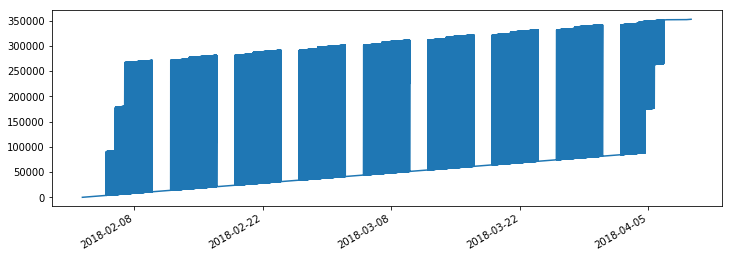

In [18]:
rng = rng.append([rng + pd.offsets.BDay(i)  for i in range(1,4)])
ts  = pd.Series(np.arange( len(rng), dtype=float), index=rng)

%matplotlib inline
ts.plot(figsize=(12,4))

In [19]:
# 10시 30분 데이터를 색인출력한다

from datetime import time
ts[time(10,30)].head(3)  

2018-02-02 10:30:00      60.0
2018-02-03 10:30:00    1500.0
2018-02-04 10:30:00    2940.0
dtype: float64

In [20]:
ts.at_time(time(10,30)).head(3)

2018-02-02 10:30:00      60.0
2018-02-03 10:30:00    1500.0
2018-02-04 10:30:00    2940.0
dtype: float64

In [21]:
# 두시간 사이의 값을 색인한다
ts.between_time(time(10,0), time(10,3)).head(10)

2018-02-02 10:00:00      30.0
2018-02-02 10:01:00      31.0
2018-02-02 10:02:00      32.0
2018-02-02 10:03:00      33.0
2018-02-03 10:00:00    1470.0
2018-02-03 10:01:00    1471.0
2018-02-03 10:02:00    1472.0
2018-02-03 10:03:00    1473.0
2018-02-04 10:00:00    2910.0
2018-02-04 10:01:00    2911.0
dtype: float64

<br>
### **05 데이터와 함께 나누기** 
1. 데이터 원본을 특정 시점의 데이터로 변환
1. 다른 시계열을 사용하여 누락된 값 채워넣기
1. 데이터를 국가 및 자신지표 기준으로 분류하여 대체하기

In [22]:
data1 = pd.DataFrame(np.ones((6,3), dtype=float),
                    columns=['a', 'b', 'c'],
                    index = pd.date_range('1/12/2017', periods=6))
data2 = pd.DataFrame(np.ones((6,3), dtype=float),
                    columns=['a', 'b', 'c'],
                    index = pd.date_range('1/13/2017', periods=6))

spliced = pd.concat([data1.loc[:'2017-01-14'], data2.loc['2017-01-15':]])
spliced

,a,b,c
2017-01-12,1.0,1.0,1.0
2017-01-13,1.0,1.0,1.0
2017-01-14,1.0,1.0,1.0
2017-01-15,1.0,1.0,1.0
2017-01-16,1.0,1.0,1.0
2017-01-17,1.0,1.0,1.0
2017-01-18,1.0,1.0,1.0


In [23]:
data1 = pd.DataFrame(np.ones((6,3), dtype=float),
                    columns=['a', 'b', 'c'],
                    index = pd.date_range('1/12/2017', periods=6))
data2 = pd.DataFrame(np.ones((6,4), dtype=float),
                    columns=['a', 'b', 'c', 'd'],
                    index = pd.date_range('1/13/2017', periods=6))

spliced = pd.concat([data1.loc[:'2017-01-14'], data2.loc['2017-01-15':]])
spliced

,a,b,c,d
2017-01-12,1.0,1.0,1.0,NaN
2017-01-13,1.0,1.0,1.0,NaN
2017-01-14,1.0,1.0,1.0,NaN
2017-01-15,1.0,1.0,1.0,1.0
2017-01-16,1.0,1.0,1.0,1.0
2017-01-17,1.0,1.0,1.0,1.0
2017-01-18,1.0,1.0,1.0,1.0


In [24]:
# 빈 부분의 데이터는 'data2'의 내용을 빌려와서 채운다
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2017-01-12,1.0,1.0,1.0,NaN
2017-01-13,1.0,1.0,1.0,1.0
2017-01-14,1.0,1.0,1.0,1.0
2017-01-15,1.0,1.0,1.0,1.0
2017-01-16,1.0,1.0,1.0,1.0
2017-01-17,1.0,1.0,1.0,1.0
2017-01-18,1.0,1.0,1.0,1.0


In [25]:
# 직접 빈 부분을 메운다
cp_sliced = spliced.copy()
cp_sliced[['a', 'c']] = data1[['a','c']]
cp_sliced

,a,b,c,d
2017-01-12,1.0,1.0,1.0,NaN
2017-01-13,1.0,1.0,1.0,NaN
2017-01-14,1.0,1.0,1.0,NaN
2017-01-15,1.0,1.0,1.0,1.0
2017-01-16,1.0,1.0,1.0,1.0
2017-01-17,1.0,1.0,1.0,1.0
2017-01-18,NaN,1.0,NaN,1.0


<br><br>
## **2 금융데이터 시계열 분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 다른 빈도를 갖는 시계열 연산**
데이터 불러오기

In [26]:
from googlefinance.get import get_data

price = get_data('NASDAQ:AAPL', '7Y').close
price[-5:]

date
2018-03-30    167.78
2018-04-03    166.68
2018-04-04    168.39
2018-04-05    171.61
2018-04-06    172.80
Name: close, dtype: float64

In [27]:
# 2013-08-03 ~ 2013-10-03 사이의 주가변화율 계산
# 1 : 단위 투자비용 (ex)수수료)
price["2013-10-03"] / price["2013-08-03"] -1

0.05841404358353519

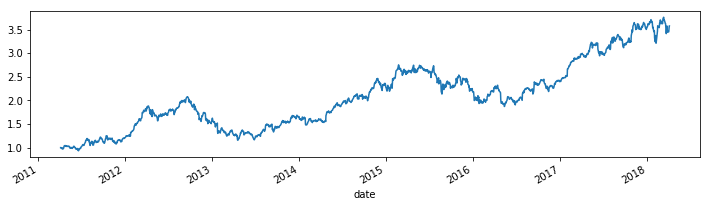

In [28]:
# .pct_change() : 퍼센트 변화율을 계산
# .cumprod() : 누적 곱 계산
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1

%matplotlib inline
ret_index.plot(figsize=(12,3))

<br>
### **02 누적 수익률 및 배당비율 추가하기**
데이터 불러오기

In [29]:
# 특정기간의 누적 수익을 계산한다
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2012']

date
2012-01-31    0.118369
2012-02-29    0.181860
2012-03-30    0.138972
2012-04-30   -0.011249
2012-05-31   -0.039471
2012-06-29   -0.017525
2012-07-31    0.045639
2012-08-31    0.115741
2012-09-28    0.026276
2012-10-31   -0.113429
2012-11-30   -0.024290
2012-12-31   -0.135348
Freq: BM, Name: close, dtype: float64

In [30]:
# 특정기간의 뭘별 백분율 변화를 계산한다
m_rets = (1 + returns).resample('M', kind='period').prod() - 1
m_rets['2012']

date
2012-01    0.118562
2012-02    0.181860
2012-03    0.119754
2012-04    0.005721
2012-05   -0.039471
2012-06    0.008339
2012-07    0.018818
2012-08    0.115741
2012-09    0.004882
2012-10   -0.094553
2012-11   -0.024290
2012-12   -0.135348
Freq: M, Name: close, dtype: float64

In [31]:
# 배당일에 배당 비율을 추가하는 경우
m_returns['2012-03-30'] += 0.003

<br><br>
### **03 금융 데이터 그룹 변환과 분석**
데이터 불러오기
<br><br>
### **Introduction**

In [32]:
# 문자열 변환 (ascii_uppercase)
import random, string 
random.seed(0)

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices)  for _ in range(n)])

tickers = np.array([rands(5) for _ in range(N)])
tickers[:15]

array(['MYNBI', 'QPMZJ', 'PLSGQ', 'EJEYD', 'TZIRW', 'ZTEJD', 'XCVKP',
       'RDLNK', 'TUGRP', 'OQIBZ', 'RACXM', 'WZVUA', 'TPKHX', 'KWCGS',
       'HHZEZ'], dtype='<U5')

In [33]:
M = 500
df = pd.DataFrame({'Momentum'      : np.random.randn(M) / 200 + 0.03,
                   'value'         : np.random.randn(M) / 200 + 0.08,
                   'ShortInterest' : np.random.randn(M) / 200 - 0.02} ,
                  index = tickers[:M])
df.head()

,Momentum,ShortInterest,value
MYNBI,0.021929,-0.016164,0.078283
QPMZJ,0.023943,-0.022007,0.081279
PLSGQ,0.023523,-0.015822,0.080397
EJEYD,0.024280,-0.016516,0.074345
TZIRW,0.037281,-0.024633,0.076892


In [34]:
ind_names  = np.array(['FINANCIAL','TECH'])
sampler    = np.random.randint(0, len(ind_names), N)
industries = pd.Series(ind_names[sampler], index=tickers, name = 'industry')
industries[::80]

MYNBI         TECH
BXWTU    FINANCIAL
HLCTE    FINANCIAL
KIAQB         TECH
LFEKX         TECH
RWEFF         TECH
APLQK         TECH
ICBEK    FINANCIAL
IZAGF         TECH
PGWFT         TECH
DPHQB    FINANCIAL
CBCLM    FINANCIAL
NPODI    FINANCIAL
Name: industry, dtype: object

In [35]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,value
industry,,,
FINANCIAL,0.030106,-0.020539,0.080069
TECH,0.029843,-0.019805,0.080317


In [36]:
by_industry.describe()

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    242.0  0.030106  0.004950  0.013011  0.026920  0.030308   
TECH         258.0  0.029843  0.004767  0.017643  0.026722  0.029690   

                              ShortInterest              ...               \
                75%       max         count      mean    ...          75%   
industry                                                 ...                
FINANCIAL  0.033236  0.044260         242.0 -0.020539    ...    -0.017236   
TECH       0.032992  0.042735         258.0 -0.019805    ...    -0.016827   

                     value                                                    \
                max  count      mean       std       min       25%       50%   
industry                                                                       
FINANCIAL -0.006710  242.0  0.080069  0.005247  0.063014  0.076406  0.080122   
TECH      -0.002056  258.0  0.080317  0.005195  0.066668  0.077200  0.079962   

                               
                75%       max  
industry                       
FINANCIAL  0.083668  0.094682  
TECH       0.083947  0.091855  

[2 rows x 24 columns]

In [37]:
# 산업 테마 표준화
def zscore(group):
    return (group - group.mean() / group.std())

df_stand = by_industry.apply((zscore))
df_stand.head()

,Momentum,ShortInterest,value
MYNBI,-6.238273,4.112674,-15.383183
QPMZJ,-6.236259,4.106832,-15.380187
PLSGQ,-6.059086,3.974042,-15.180443
EJEYD,-6.235922,4.112322,-15.387121
TZIRW,-6.045328,3.965231,-15.183948


In [38]:
# 각 산업의 평균 / 표준편차
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum           ShortInterest                value          
               mean       std          mean       std       mean       std
industry                                                                  
FINANCIAL -6.052503  0.004950      3.969324  0.005148 -15.180771  0.005247
TECH      -6.230359  0.004767      4.109034  0.004797 -15.381149  0.005195

In [39]:
ind_rank = by_industry.rank(ascending = False) # 내림차순
ind_rank.groupby(industries).agg(['min','max'])

Momentum        ShortInterest        value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  242.0           1.0  242.0   1.0  242.0
TECH           1.0  258.0           1.0  258.0   1.0  258.0

In [40]:
# 산업 순위와 표준화
by_industry.apply(lambda x : zscore(x.rank())).info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, MYNBI to GXKFD
Data columns (total 3 columns):
Momentum         500 non-null float64
ShortInterest    500 non-null float64
value            500 non-null float64
dtypes: float64(3)
memory usage: 35.6+ KB


<br><br>
### **데이터를 그룹별 분석**

In [41]:
from numpy.random import randn
fac1, fac2, fac3 = np.random.randn(3,1000)
ticker_subset    = tickers.take(np.random.permutation(N)[:1000])
ticker_subset[:30]

array(['VQGXK', 'XOLFI', 'GBYBQ', 'EGFHA', 'ONVNA', 'JJQES', 'MUSXH',
       'VSQKX', 'THVMQ', 'KUECW', 'HEWTV', 'PUUHA', 'GWBKE', 'IERWA',
       'ZDULQ', 'TOBHP', 'YSTQG', 'SFUQB', 'XUXGI', 'NGPPW', 'UIIMD',
       'EMOWR', 'ETMYL', 'RPPKZ', 'VOLSW', 'UOSES', 'VANJK', 'OTOFF',
       'AZEME', 'BTKZM'], dtype='<U5')

In [42]:
# 임의의 값을 추가한 요인들의 가중합
port = pd.Series(0.7 * fac1 - 
                 1.2 * fac2 + 
                 0.3 + fac3 + randn(1000), 
                 index = ticker_subset)
port[:3]

VQGXK   -1.597379
XOLFI    0.227894
GBYBQ    2.431943
dtype: float64

In [43]:
factors = pd.DataFrame({'f1':fac1, 
                        'f2':fac2, 
                        'f3':fac3}, 
                       index = ticker_subset)
factors.head(3)

,f1,f2,f3
VQGXK,-1.025002,1.878394,0.202212
XOLFI,-1.136001,0.267663,0.544709
GBYBQ,0.297344,-0.284171,0.511929


In [44]:
# 요인과 포트폴리오 간의 상관관계
factors.corrwith(port)

f1    0.364856
f2   -0.613266
f3    0.525206
dtype: float64

<br><br>
### **주가의 십분위 사분위 분석**
pandas

In [45]:
px = get_data('NASDAQ:INTC', period='6Y').close
px.head()

date
2012-04-10    27.76
2012-04-11    27.45
2012-04-12    27.85
2012-04-13    28.48
2012-04-14    28.09
Name: close, dtype: float64

In [46]:
# 수익을 추세신호로 변환
def trend_signal(rets, lookback, lag):
    
    signal = rets.rolling(lookback, 
                          min_periods = lookback - 5).sum()
    return signal.shift(lag)

signal = trend_signal(returns, 100, 3)
signal.tail()

date
2018-03-30    0.046229
2018-04-03    0.006672
2018-04-04    0.008342
2018-04-05    0.008841
2018-04-06   -0.023829
Name: close, dtype: float64

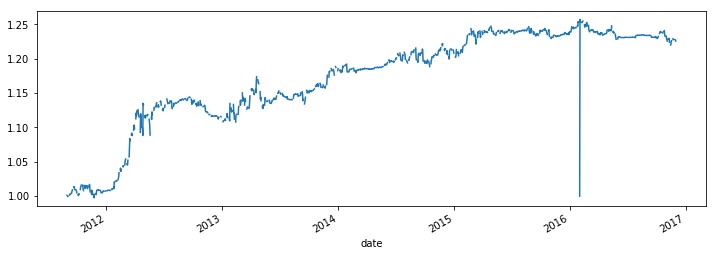

In [47]:
# 매주 주 금요일 모멘텀 신호 거래투자 전력을 시뮬레이션 한다
signal       = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
trade_rets   = trade_friday.shift(1) * returns
trade_rets   = trade_rets[:len(returns)]

# 일별 수익을 계산
def to_index(rets):
    index     = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc( index.idxmax() )-1, 0)
    index.values[first_loc] = 1 # 변화율 최초의 값 '1'을 입력
    return index

# 모멘텀 전략 수익 지수 출력이 ValueError가 발생 (고쳐야 되는데...)
to_index(trade_rets).plot(figsize=(12,4))

In [48]:
vol = returns.rolling(250, min_periods=200).std() * np.sqrt(250)
vol.tail()

date
2018-03-30    0.206286
2018-04-03    0.206414
2018-04-04    0.206525
2018-04-05    0.207260
2018-04-06    0.207325
Name: close, dtype: float64

In [49]:
# pd.qcut() : vol을 4분위로 나눈 뒤 Sharpe를 집계한다
def sharpe(rets, ann=250):
    return rets.mean() / rets.std() * np.sqrt(ann)

trade_rets.groupby(pd.qcut(vol,4)).agg(sharpe)

close
(0.167, 0.216]   -1.204066
(0.216, 0.253]    1.614346
(0.253, 0.281]    0.692444
(0.281, 0.327]    1.128359
Name: close, dtype: float64

<br><br>
## **3 추가 예제분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 신호 경계 분석**
횡단면 모멘텀 포트폴리오와 모델 매개변수화의 그리드 탐색

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


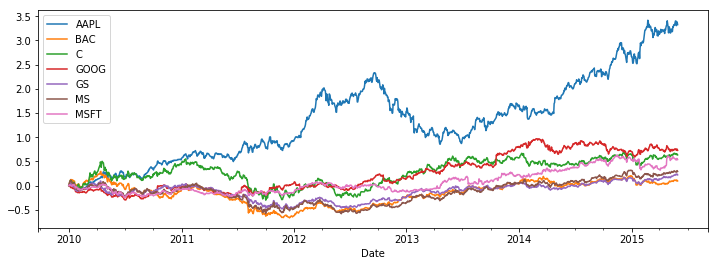

In [50]:
from googlefinance.get import get_data_yahoo
def get_px(stock, start, end):
    return get_data_yahoo(stock, start, end)['Close']

names = ['AAPL','GOOG','MSFT','GS','MS','BAC','C']
px    = pd.DataFrame({n: get_px(n, '2010-01-01', '2015-06-01')   for n in names})
px    = px.asfreq('B').fillna(method='pad')
rets  = px.pct_change()

# 주식의 누적 수익률 시각화
((1+rets).cumprod() -1).plot(figsize=(12,4))

In [51]:
# 특정 과거의 모멘텀을 계산한 다음 내림차순으로 정렬하고 표준화
def calc_mom(price, lookback, lag):
    mom_ret  = price.shift(lag).pct_change(lookback)        # 변동률 데이터로 변환
    ranks    = mom_ret.rank(axis=1, ascending=False)        # 내림차순 정렬
    demeaned = ranks.subtract(ranks.mean(axis=1), axis =0)  # 데이터를 표준화 
    return demeaned.divide(demeaned.std(axis=1),  axis =0) 


# BackTest : 포트폴리오 보유기간(매매기간)을 계산하고 샤프지수를 반환
def strat_sr(prices, lb, hold):
    
    compound   = lambda x : (1 + x).prod() -1  # 포트폴리오 보유(매매)기간 계산    
    daily_sr   = lambda x : x.mean() / x.std() # 샤프지수 반환 백 테스트 함수
    
    # 포트폴리오 가중치 계산
    freq       = '%dB' % hold  # "30B" : 30 Business Day
    port       = calc_mom(prices, lb, lag=1)
    daily_rets = prices.pct_change()

    # 포트폴리오 수익 계산
    port       = port.shift(1).resample(freq).first()
    returns    = daily_rets.resample(freq).apply(compound)
    port_rets  = (port * returns).sum(axis=1)
    return daily_sr(port_rets) * np.sqrt(252 / hold)  # 연간 비율의 샤프지수값 계산

strat_sr(px, 70, 30)

-0.12571458117609513

In [52]:
from collections import defaultdict
lookbacks = range(20, 90, 5) # 14개로 구간을 분할
holdings  = range(20, 90, 5) 
dd        = defaultdict(dict)

for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold) # 14 X 14 배열을 생성

ddf              = pd.DataFrame(dd)
ddf.index.name   = 'Holding Period'
ddf.columns.name = 'Lookback Period'
ddf.head(3)

Lookback Period,20,25,30,35,40,45,50,55,60,65,70,75,80,85
Holding Period,,,,,,,,,,,,,,
20,-0.658952,-0.386214,-0.376905,-0.282361,-0.146145,-0.514091,-0.603280,-0.494521,-0.420901,-0.241604,-0.330594,-0.179816,-0.054841,-0.248572
25,-0.354339,-0.919289,-0.521754,-0.254991,-0.327190,-0.224852,-0.359067,-0.228337,-0.331748,-0.342718,-0.301921,-0.287468,-0.311381,-0.208492
30,-0.359280,-0.626603,-0.434906,-0.256761,-0.291453,-0.442570,-0.375152,-0.472110,-0.278580,-0.216305,-0.125715,-0.104901,-0.124167,-0.198585


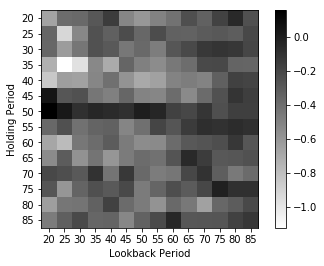

In [53]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

heatmap(ddf)

<br><br>
## **4 선물계약 롤링**
1. 선물은 특성상 만기가 가까운 상품일수록 매매가 활발하다
1. 이때 만기상품에서 다음거래상품으로 갈아탐을 **롤링**이라고 한다
1. 이와같이 예측과 모델링이 목적일땐, **이익과 손해를 연속된 수익지수**로 다루는 편이 쉽다

<br>
### **01 선물 데이터 생성**
인덱스 지수 데이터 수집후, 수집일 이후의 임의의 선물데이터 생성

In [54]:
px = get_data('INDEXNASDAQ:.IXIC', '7Y').close * 10
px[:5]

date
2011-04-07    27998.2
2011-04-08    27961.4
2011-04-09    27804.1
2011-04-12    27715.1
2011-04-13    27447.9
Name: close, dtype: float64

In [55]:
# 선물지수 계약일과 만기일을 객체로 저장
from datetime import datetime
expiry = {'ESU2' : datetime(2012, 9, 21),
          'ESZ2' : datetime(2012, 12, 21)}
expiry = pd.Series(expiry).sort_values()
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [56]:
# 위 추출데이터 만기 후에 갈아탈 
# 임의의 2개의 선물 계약 데이터를 생성한다
np.random.seed(12347)
N       = 200
walk    = (np.random.randint(0, 200, size = N) - 100) * 0.25
perturb = (np.random.randint(0, 20,  size = N) - 10)  * 0.25
walk    = walk.cumsum()
rng     = pd.date_range(px.index[0], periods = len(px) + N, freq='B')
near    = np.concatenate([px.values, px.values[-1] + walk])
far     = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices  = pd.DataFrame({'ESU2' : near, 
                        'ESZ2' : far }, index = rng)
prices.tail()

,ESU2,ESZ2
2018-10-05,70794.766018,70796.516018
2018-10-08,70781.016018,70783.266018
2018-10-09,70789.016018,70790.766018
2018-10-10,70805.516018,70804.766018
2018-10-11,70785.516018,70783.266018


<br>
### **02 선물 롤링함수 생성하기**
1. 선물데이터의 가중치 계산 사용자 함수
1. 마지막으로 갈아탄 선물수익은 계약수익의 가중치 합과 동일하다

In [57]:
# 만기까지의 기간에 대한 선형붕괴의 값으로 가중행렬을 계산
# {start : 가중 df 시작일, expiry : 종목 Series => 만기일,  items : 계약 이름 리스트}
def get_roll_weights(start, expiry, items, roll_periods=5):
    dates     = pd.date_range(start, expiry[-1], freq='B')
    weights   = pd.DataFrame(np.zeros((len(dates), len(items))),
                             index   = dates, 
                             columns = items)
    prev_date = weights.index[0]
    for i, (item, ex_date)  in  enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.loc[ prev_date:ex_date - pd.offsets.BDay(), item ] = 1
            roll_rng = pd.date_range(end     = ex_date - pd.offsets.BDay(),
                                     periods = roll_periods + 1, 
                                     freq    = 'B')
            decay_weights              = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item]                = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1
        prev_date = ex_date
    return weights

weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.loc['2012-9-12':'2012-9-21']

,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


In [58]:
# 마지막 선물 수익 가중합
rolled_returns = (prices.pct_change() * weights).sum()
rolled_returns

ESU2    0.102279
ESZ2   -0.003453
dtype: float64

<br>
### **03 롤링 상관관계와 선형 회귀**
1. 동적모델은 매매결정을 시뮬레이션하는데 사용 (특히 시계열 데이터에 적용)
1. 상관분석 : 두 시계열 상의 변화를 비교가능하다

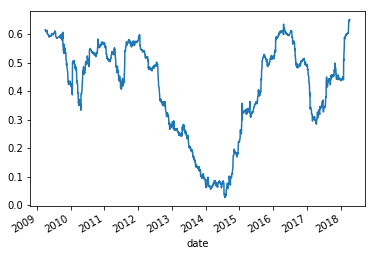

In [59]:
symbols   = ['NASDAQ:AAPL',   'NASDAQ:MSFT']
px_       = get_data(symbols, '10Y', output='close')
aapl      = px_[symbols[0]]
msft      = px_[symbols[1]]
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

# 연간 이동 상관관계를 시각화
pd.Series.rolling(aapl_rets, 250).corr(msft_rets).plot()

<br>
### **04 두 자산의 최소제곱 회귀분석**
1. 상관관계 분석은 **유동성의 차이**를 잡아내지 못한다
1. **최소제곱 회귀분석**은 변수 사이의 동적관계를 모델링 한다

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [67]:
import numpy as np
import statsmodels.api as sm

# Fit and summarize OLS model
model = sm.OLS(aapl, msft).fit()
predictions = model.predict(msft_rets)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NASDAQ:AAPL   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 5.586e+04
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:47:19   Log-Likelihood:                -10941.
No. Observations:                2517   AIC:                         2.188e+04
Df Residuals:                    2516   BIC:                         2.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
NASDAQ:MSFT     2.0264      0.009    236.345      0.000       2.010       2.043
==============================================================================
Omnibus:                       54.326   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.966
Skew:                           0.189   Prob(JB):                     5.70e-09
Kurtosis:                       2.532   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""